# Austin Airbnb Listings
This notebook will be the main notebook for the captsone project

In [1]:
import pandas as pd 
import numpy as np

In [72]:
df = pd.read_csv('gs://data-botello/austin_airnbnb_listings_2020_09_18_LBS_edit.csv' , sep = ',', low_memory=False)

In [73]:
pd.set_option('display.max_columns' , None)
df.head()

,id,listing_url,last_scraped,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,9/18/2020,2466,https://www.airbnb.com/users/show/2466,Paddy,8/23/2008,"Austin, Texas, United States",within a day,100%,100%,t,East Downtown,3.0,t,t,78702,30.27750,-97.71398,Entire house,Entire home/apt,4,2 baths,2.0,2.0,"[""Dishwasher"", ""Hot water"", ""Microwave"", ""Cabl...",$177.00,7,180,t,0,17,47,136,24,0,0,3/17/2009,3/16/2019,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,0.17
1,5245,https://www.airbnb.com/rooms/5245,9/18/2020,2466,https://www.airbnb.com/users/show/2466,Paddy,8/23/2008,"Austin, Texas, United States",within a day,100%,100%,t,East Downtown,3.0,t,t,78702,30.27577,-97.71379,Private room in house,Private room,2,1 private bath,1.0,2.0,"[""Hot water"", ""Luggage dropoff allowed"", ""Cabl...",$114.00,30,60,t,0,0,0,0,9,0,0,3/19/2009,3/14/2018,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,0.06
2,5456,https://www.airbnb.com/rooms/5456,9/18/2020,8028,https://www.airbnb.com/users/show/8028,Sylvia,2/16/2009,"Austin, Texas, United States",within a few hours,100%,94%,t,East Downtown,1.0,t,t,78702,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,1 bath,1.0,2.0,"[""Hot water"", ""Microwave"", ""Luggage dropoff al...",$99.00,2,90,t,24,54,84,359,535,35,0,3/8/2009,7/12/2020,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.81
3,5636,https://www.airbnb.com/rooms/5636,9/18/2020,7148,https://www.airbnb.com/users/show/7148,Peggy,1/27/2009,"Austin, Texas, United States",within an hour,100%,100%,f,Bouldin Creek,1.0,t,f,78704,30.24630,-97.76361,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""Hangers"", ""Shampoo"", ""Essentials""...",$46.00,30,90,t,11,20,50,63,20,0,0,4/20/2009,5/24/2012,95.0,9.0,10.0,10.0,10.0,10.0,9.0,t,0.14
4,5769,https://www.airbnb.com/rooms/5769,9/18/2020,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2/19/2009,"Austin, Texas, United States",within an hour,100%,100%,t,SW Williamson Co.,1.0,t,t,78729,30.45697,-97.78422,Private room in house,Private room,2,1 shared bath,1.0,1.0,"[""Heating"", ""Hot water"", ""Shampoo"", ""Essential...",$39.00,1,14,t,0,16,46,46,257,4,0,4/10/2010,11/3/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.02


In [74]:
df.shape

(10436, 48)

__Dropping Columns:__ Dropping columns from a dataset is not always reccomended because it is not always known when certain data will be required. However, from initial inspection of the dataset, we can determine certain columns that are either totally unecessary, redudant or do not contain information. 
- *listing_url* - It is out of the scope of this project to scrape for additional data on the web
- *host_url* - It is out of the scope of this project to scrape for additional data on the web
- *host_name* - this feauture becomes unecessary given *host_id* feauture, a unique identifier, is provided

In [75]:
#DROP UNECESSARY COLUMNS
df = df.drop(columns=['listing_url','host_url','host_name'])

In [76]:
df.shape

(10436, 45)

In [77]:
df = df.rename(columns={'neighbourhood_cleansed':'zip_code', 'bathrooms_text':'bathrooms',
                  'host_neighbourhood':'neighborhood'})

## Dealing with Missing Data

In [78]:
missing_data = df.isnull().sum() #isnull() returns dataframe where missing values get mapped to True values 
missing_data

id                                0
last_scraped                      0
host_id                           0
host_since                        3
host_location                    23
host_response_time             4158
host_response_rate             4158
host_acceptance_rate           3015
host_is_superhost                 3
neighborhood                   2012
host_listings_count               3
host_has_profile_pic              3
host_identity_verified            3
zip_code                          0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        15
bedrooms                        651
beds                             51
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30             

__host_since:__ Only 3 out of more than 10k observations are missing, which represents roughly about ~.03% of cases. Due to this low percentage, listwise deletion will be employed to hanlde the missing data. 

In [79]:
df = df.dropna(subset = ['host_since'], axis = 0) #drop rows with missing values in 'host_since' column
df = df.reset_index(drop = True) #Don't forget to resent index. Drop = True drops previous index. 

In [80]:
df.shape

(10433, 45)

In [81]:
missing_data = df.isnull().sum() 
missing_data

id                                0
last_scraped                      0
host_id                           0
host_since                        0
host_location                    20
host_response_time             4155
host_response_rate             4155
host_acceptance_rate           3012
host_is_superhost                 0
neighborhood                   2009
host_listings_count               0
host_has_profile_pic              0
host_identity_verified            0
zip_code                          0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        15
bedrooms                        651
beds                             51
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30             

__host_location:__

In [82]:
df['host_location'].value_counts()

Austin, Texas, United States                7329
US                                           768
Houston, Texas, United States                717
San Francisco, California, United States     236
United States                                112
                                            ... 
Mobile, Alabama, United States                 1
Dale, Texas, United States                     1
Grants Pass, Oregon, United States             1
Berea, Kentucky, United States                 1
Gainesville, Florida, United States            1
Name: host_location, Length: 400, dtype: int64

In [83]:
df['host_location'].str.contains('United States|US').value_counts()

True     10291
False      122
Name: host_location, dtype: int64

Note that a grand majority (~70%) of hosts are located in Austin, Texas. Furthermore, around 99% of hosts are located in the United States. There are only 20 records without a host location, a reasonable approach to deal with this missing data is to assume the missing hosts are located in the United States. 

In [84]:
df = df.fillna({'host_location':'United States'})

In [85]:
#Replace 'US' with 'United States' for consistency
df['host_location'] = df['host_location'].replace(to_replace = 'US', value = 'United States')

In [86]:
missing_data = df.isnull().sum() 
missing_data

id                                0
last_scraped                      0
host_id                           0
host_since                        0
host_location                     0
host_response_time             4155
host_response_rate             4155
host_acceptance_rate           3012
host_is_superhost                 0
neighborhood                   2009
host_listings_count               0
host_has_profile_pic              0
host_identity_verified            0
zip_code                          0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        15
bedrooms                        651
beds                             51
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30             

__host_response_rate & host_acceptance_rate:__ Around 30% of 'host response rate' and 40% of 'host acceptance rate' values are missing. Deleting the rows with missing values is not an option as it would result in a significant reduction of the dataset. Due to the fact that these features contain numerical values, assigning a mean to the missing cells seems like a reasonable approach. 

In [87]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%','') #Remove % sign
avg_host_response_rate = df['host_response_rate'].astype("float").mean() #Obtain mean
df['host_response_rate']=df['host_response_rate'].replace(np.nan, avg_host_response_rate)#Assign mean to missing cells

In [88]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%','')
avg_host_acceptance_rate = df['host_acceptance_rate'].astype('float').mean()
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace(np.nan, avg_host_acceptance_rate)

__Neighborhood:__ The only option for this feature is to label missing values as "Unavailable" or some other way. Fortunately, the dataset contains zipcodes and coordinates for all records, which are more precise location features. 

In [89]:
df = df.fillna({'neighborhood':'Unavailable'})

In [90]:
missing_data = df.isnull().sum() 
missing_data

id                                0
last_scraped                      0
host_id                           0
host_since                        0
host_location                     0
host_response_time             4155
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
neighborhood                      0
host_listings_count               0
host_has_profile_pic              0
host_identity_verified            0
zip_code                          0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        15
bedrooms                        651
beds                             51
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30             

In [91]:
df.shape

(10433, 45)

__Bathrooms:__ Only 15 observations, out of more than 10k, contain no data for the 'bathrooms' column. This is roughly ~.15% of observations, which is why listwise deletion will be employed to handle the missing data. 

In [92]:
df = df.dropna(subset = ['bathrooms'], axis = 0) #drop rows with missing values
df = df.reset_index(drop = True) #Reset index
df.shape

(10418, 45)

In [93]:
df.insert(20, 'shared_bathroom', 0) #Insert new column

In [94]:
df['shared_bathroom'] = df['bathrooms'].map(lambda x: 1 if 'shared' in x else 0)#Populate new column based on condition

In [95]:
df['bathrooms'] = df['bathrooms'].map(lambda x: '0.5' if 'half' in x else x) #Replace 'half' with '0.5'
df['bathrooms'] = df['bathrooms'].map(lambda x: '0.5' if 'Half' in x else x) #'0.5' is a string, to iterate again. 

In [96]:
df['bathrooms'] = df['bathrooms'].replace(to_replace = r"[a-zA-Z-]", value = '', regex = True) #Remove all letters. 
df['bathrooms'] = df['bathrooms'].replace(to_replace = ' ', value = '', regex = True) #Remove all whitespace

In [97]:
df['bathrooms'] = pd.to_numeric(df['bathrooms'])  #Cast to float

In [98]:
df['bathrooms'].isnull().sum() #Check for null values

0

In [99]:
df['bathrooms'].value_counts().sum()

10418

In [100]:
df['bathrooms'].value_counts()

1.0     6065
2.0     2133
2.5      691
1.5      654
3.0      383
3.5      161
4.0      127
4.5       62
5.0       41
0.0       22
5.5       20
6.0       16
6.5       14
0.5       12
7.5        6
7.0        4
8.0        3
10.0       1
10.5       1
17.0       1
9.0        1
Name: bathrooms, dtype: int64

In [101]:
df.head()

,id,last_scraped,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighborhood,host_listings_count,host_has_profile_pic,host_identity_verified,zip_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,shared_bathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2265,9/18/2020,2466,8/23/2008,"Austin, Texas, United States",within a day,100,100,t,East Downtown,3.0,t,t,78702,30.27750,-97.71398,Entire house,Entire home/apt,4,2.0,0,2.0,2.0,"[""Dishwasher"", ""Hot water"", ""Microwave"", ""Cabl...",$177.00,7,180,t,0,17,47,136,24,0,0,3/17/2009,3/16/2019,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,0.17
1,5245,9/18/2020,2466,8/23/2008,"Austin, Texas, United States",within a day,100,100,t,East Downtown,3.0,t,t,78702,30.27577,-97.71379,Private room in house,Private room,2,1.0,0,1.0,2.0,"[""Hot water"", ""Luggage dropoff allowed"", ""Cabl...",$114.00,30,60,t,0,0,0,0,9,0,0,3/19/2009,3/14/2018,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,0.06
2,5456,9/18/2020,8028,2/16/2009,"Austin, Texas, United States",within a few hours,100,94,t,East Downtown,1.0,t,t,78702,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,1.0,0,1.0,2.0,"[""Hot water"", ""Microwave"", ""Luggage dropoff al...",$99.00,2,90,t,24,54,84,359,535,35,0,3/8/2009,7/12/2020,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.81
3,5636,9/18/2020,7148,1/27/2009,"Austin, Texas, United States",within an hour,100,100,f,Bouldin Creek,1.0,t,f,78704,30.24630,-97.76361,Entire apartment,Entire home/apt,2,1.0,0,1.0,1.0,"[""Heating"", ""Hangers"", ""Shampoo"", ""Essentials""...",$46.00,30,90,t,11,20,50,63,20,0,0,4/20/2009,5/24/2012,95.0,9.0,10.0,10.0,10.0,10.0,9.0,t,0.14
4,5769,9/18/2020,8186,2/19/2009,"Austin, Texas, United States",within an hour,100,100,t,SW Williamson Co.,1.0,t,t,78729,30.45697,-97.78422,Private room in house,Private room,2,1.0,1,1.0,1.0,"[""Heating"", ""Hot water"", ""Shampoo"", ""Essential...",$39.00,1,14,t,0,16,46,46,257,4,0,4/10/2010,11/3/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.02


__Beds:__

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

<AxesSubplot:xlabel='accommodates', ylabel='beds'>

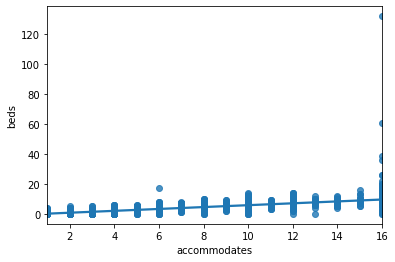

In [118]:
sns.regplot(x="accommodates", y="beds", data=df)   #Regression PLot

In [104]:
beds_missing_values = df[df['beds'].isnull()].copy()
print(beds_missing_values['accommodates'].max())
print(beds_missing_values['accommodates'].min())

7
1


<AxesSubplot:xlabel='accommodates', ylabel='beds'>

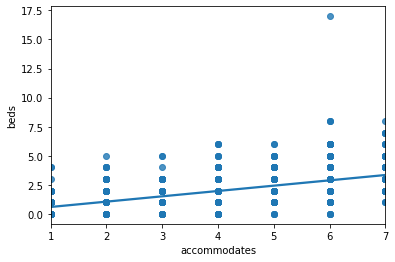

In [122]:
df_plot = df.loc[df['accommodates'] < 8 ]
sns.regplot(x="accommodates", y="beds", data=df_plot)   #Regression PLot

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
train = df[df['beds'].notnull()]  #Obtain data to train model, non-missing rows from dataset. 
lm = LinearRegression()   #Set Linear Regression object
X = train[['accommodates']]
Y = train[['beds']]
lm.fit(X,Y)  #Fit model

LinearRegression()

In [107]:
Yhat = lm.predict(beds_missing_values[['accommodates']])

In [108]:
Yhat[0:5]

array([[2.05650594],
       [1.42652461],
       [0.79654328],
       [2.05650594],
       [0.79654328]])

In [109]:
Yhat_rounded = np.round_(Yhat,decimals=0)  #numpy array

In [110]:
beds_missing_values[['beds']] = Yhat_rounded  #Impute results from model into dataframe

In [111]:
beds_missing_values['beds'].value_counts()

1.0    30
2.0     7
0.0     4
3.0     3
4.0     2
Name: beds, dtype: int64

In [112]:
df_beds_imputation = train.append(beds_missing_values).sort_index()
df_beds_imputation

,id,last_scraped,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighborhood,host_listings_count,host_has_profile_pic,host_identity_verified,zip_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,shared_bathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2265,9/18/2020,2466,8/23/2008,"Austin, Texas, United States",within a day,100,100,t,East Downtown,3.0,t,t,78702,30.277500,-97.713980,Entire house,Entire home/apt,4,2.0,0,2.0,2.0,"[""Dishwasher"", ""Hot water"", ""Microwave"", ""Cabl...",$177.00,7,180,t,0,17,47,136,24,0,0,3/17/2009,3/16/2019,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,0.17
1,5245,9/18/2020,2466,8/23/2008,"Austin, Texas, United States",within a day,100,100,t,East Downtown,3.0,t,t,78702,30.275770,-97.713790,Private room in house,Private room,2,1.0,0,1.0,2.0,"[""Hot water"", ""Luggage dropoff allowed"", ""Cabl...",$114.00,30,60,t,0,0,0,0,9,0,0,3/19/2009,3/14/2018,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,0.06
2,5456,9/18/2020,8028,2/16/2009,"Austin, Texas, United States",within a few hours,100,94,t,East Downtown,1.0,t,t,78702,30.261120,-97.734480,Entire guesthouse,Entire home/apt,3,1.0,0,1.0,2.0,"[""Hot water"", ""Microwave"", ""Luggage dropoff al...",$99.00,2,90,t,24,54,84,359,535,35,0,3/8/2009,7/12/2020,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.81
3,5636,9/18/2020,7148,1/27/2009,"Austin, Texas, United States",within an hour,100,100,f,Bouldin Creek,1.0,t,f,78704,30.246300,-97.763610,Entire apartment,Entire home/apt,2,1.0,0,1.0,1.0,"[""Heating"", ""Hangers"", ""Shampoo"", ""Essentials""...",$46.00,30,90,t,11,20,50,63,20,0,0,4/20/2009,5/24/2012,95.0,9.0,10.0,10.0,10.0,10.0,9.0,t,0.14
4,5769,9/18/2020,8186,2/19/2009,"Austin, Texas, United States",within an hour,100,100,t,SW Williamson Co.,1.0,t,t,78729,30.456970,-97.784220,Private room in house,Private room,2,1.0,1,1.0,1.0,"[""Heating"", ""Hot water"", ""Shampoo"", ""Essential...",$39.00,1,14,t,0,16,46,46,257,4,0,4/10/2010,11/3/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,45469731,9/18/2020,188243764,5/7/2018,"Austin, Texas, United States",NaN,95.5158,88.8834,f,North Loop,0.0,t,t,78751,30.322010,-97.727320,Entire house,Entire home/apt,6,2.0,0,2.0,3.0,"[""Heating"", ""Hangers"", ""Smart lock"", ""Essentia...",$132.00,2,1125,t,23,46,48,48,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
10414,45470113,9/18/2020,359036978,7/28/2020,"Houston, Texas, United States",within a day,100,100,t,Dawson,751.0,t,t,78735,30.250470,-97.869080,Entire serviced apartment,Entire home/apt,3,1.0,0,1.0,1.0,"[""Dishwasher"", ""Hot water"", ""Microwave"", ""Pool...",$87.00,30,365,t,25,55,85,360,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
10415,45470169,9/18/2020,359036978,7/28/2020,"Houston, Texas, United States",within a day,100,100,t,Dawson,751.0,t,t,78735,30.246780,-97.846240,Entire serviced apartment,Entire home/apt,5,2.0,0,2.0,2.0,"[""Hot water"", ""Paid parking on premises"", ""Mic...",$113.00,90,365,t,0,0,19,294,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
10416,45470263,9/18/2020,359036978,7/28/2020,"Houston, Texas, United States",within a day,100,100,t,Dawson,751.0,t,t,78704,30.239160,-97.786960,Entire serviced apartment,Entire home/apt,3,1.0,0,1.0,1.0,"[""Hot water"", ""Microwave"", ""Pool"", ""Oven"", ""TV...",$101.00,30,365,t,0,0,17,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN


In [113]:
df = df_beds_imputation

In [114]:
df

,id,last_scraped,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighborhood,host_listings_count,host_has_profile_pic,host_identity_verified,zip_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,shared_bathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2265,9/18/2020,2466,8/23/2008,"Austin, Texas, United States",within a day,100,100,t,East Downtown,3.0,t,t,78702,30.277500,-97.713980,Entire house,Entire home/apt,4,2.0,0,2.0,2.0,"[""Dishwasher"", ""Hot water"", ""Microwave"", ""Cabl...",$177.00,7,180,t,0,17,47,136,24,0,0,3/17/2009,3/16/2019,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,0.17
1,5245,9/18/2020,2466,8/23/2008,"Austin, Texas, United States",within a day,100,100,t,East Downtown,3.0,t,t,78702,30.275770,-97.713790,Private room in house,Private room,2,1.0,0,1.0,2.0,"[""Hot water"", ""Luggage dropoff allowed"", ""Cabl...",$114.00,30,60,t,0,0,0,0,9,0,0,3/19/2009,3/14/2018,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,0.06
2,5456,9/18/2020,8028,2/16/2009,"Austin, Texas, United States",within a few hours,100,94,t,East Downtown,1.0,t,t,78702,30.261120,-97.734480,Entire guesthouse,Entire home/apt,3,1.0,0,1.0,2.0,"[""Hot water"", ""Microwave"", ""Luggage dropoff al...",$99.00,2,90,t,24,54,84,359,535,35,0,3/8/2009,7/12/2020,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.81
3,5636,9/18/2020,7148,1/27/2009,"Austin, Texas, United States",within an hour,100,100,f,Bouldin Creek,1.0,t,f,78704,30.246300,-97.763610,Entire apartment,Entire home/apt,2,1.0,0,1.0,1.0,"[""Heating"", ""Hangers"", ""Shampoo"", ""Essentials""...",$46.00,30,90,t,11,20,50,63,20,0,0,4/20/2009,5/24/2012,95.0,9.0,10.0,10.0,10.0,10.0,9.0,t,0.14
4,5769,9/18/2020,8186,2/19/2009,"Austin, Texas, United States",within an hour,100,100,t,SW Williamson Co.,1.0,t,t,78729,30.456970,-97.784220,Private room in house,Private room,2,1.0,1,1.0,1.0,"[""Heating"", ""Hot water"", ""Shampoo"", ""Essential...",$39.00,1,14,t,0,16,46,46,257,4,0,4/10/2010,11/3/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,45469731,9/18/2020,188243764,5/7/2018,"Austin, Texas, United States",NaN,95.5158,88.8834,f,North Loop,0.0,t,t,78751,30.322010,-97.727320,Entire house,Entire home/apt,6,2.0,0,2.0,3.0,"[""Heating"", ""Hangers"", ""Smart lock"", ""Essentia...",$132.00,2,1125,t,23,46,48,48,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
10414,45470113,9/18/2020,359036978,7/28/2020,"Houston, Texas, United States",within a day,100,100,t,Dawson,751.0,t,t,78735,30.250470,-97.869080,Entire serviced apartment,Entire home/apt,3,1.0,0,1.0,1.0,"[""Dishwasher"", ""Hot water"", ""Microwave"", ""Pool...",$87.00,30,365,t,25,55,85,360,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
10415,45470169,9/18/2020,359036978,7/28/2020,"Houston, Texas, United States",within a day,100,100,t,Dawson,751.0,t,t,78735,30.246780,-97.846240,Entire serviced apartment,Entire home/apt,5,2.0,0,2.0,2.0,"[""Hot water"", ""Paid parking on premises"", ""Mic...",$113.00,90,365,t,0,0,19,294,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
10416,45470263,9/18/2020,359036978,7/28/2020,"Houston, Texas, United States",within a day,100,100,t,Dawson,751.0,t,t,78704,30.239160,-97.786960,Entire serviced apartment,Entire home/apt,3,1.0,0,1.0,1.0,"[""Hot water"", ""Microwave"", ""Pool"", ""Oven"", ""TV...",$101.00,30,365,t,0,0,17,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN


In [115]:
missing_data = df.isnull().sum() 
missing_data

id                                0
last_scraped                      0
host_id                           0
host_since                        0
host_location                     0
host_response_time             4143
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
neighborhood                      0
host_listings_count               0
host_has_profile_pic              0
host_identity_verified            0
zip_code                          0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
shared_bathroom                   0
bedrooms                        650
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability            

__Bedrooms__:

<AxesSubplot:xlabel='accommodates', ylabel='bedrooms'>

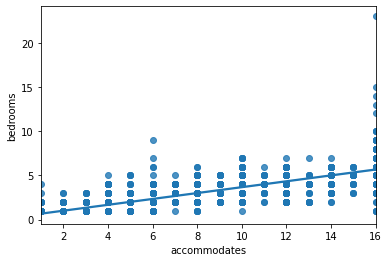

In [69]:
sns.regplot(x="accommodates", y="bedrooms", data=df)   #Regression PLot

<AxesSubplot:xlabel='beds', ylabel='bedrooms'>

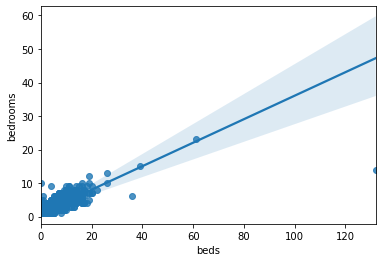

In [117]:
sns.regplot(x="beds", y="bedrooms", data=df)   #Regression PLot